In [154]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [155]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [156]:
df.shape

(20800, 5)

In [157]:
## Get the Independent Features together
X=df.drop('label',axis=1)
y=df['label']

In [158]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [159]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [160]:
#lets view Independent Features
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [161]:
#Lets view Dependent Features
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [162]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [163]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [164]:
#Lets see the distribution of the target Variables
y.value_counts(normalize=True)

1    0.500625
0    0.499375
Name: label, dtype: float64

In [165]:
#Lets Create a Replica of the data Frame
data=df.copy()

In [166]:
#Lets Reset the index as the id column has Some missing values  as we dropped the null values
data.reset_index(inplace=True)
#Lets now view that data Frame
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [167]:
#Lets view the text  of a row
data['title'][2]

'Why the Truth Might Get You Fired'

In [196]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus=[]
for i in range(0,len(data)):
    review=re.sub('^[a-zA-Z]',' ',str(data['title'][i]))
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=" ".join(review)
    corpus.append(review)

In [197]:
corpus[:]

['ous dem aide: didn’t even see comey’ letter jason chaffetz tweet',
 'lynn: hillari clinton, big woman campu - breitbart',
 'hy truth might get fire',
 '15 civilian kill singl us airstrik identifi',
 'ranian woman jail fiction unpublish stori woman stone death adulteri',
 'acki mason: hollywood would love trump bomb north korea lack tran bathroom (exclus video) - breitbart',
 'ife: life luxury: elton john’ 6 favorit shark pictur stare long, transcontinent flight',
 'enoît hamon win french socialist party’ presidenti nomin - new york time',
 'xcerpt draft script donald trump’ q&ampa black church’ pastor - new york time',
 'back-channel plan ukrain russia, courtesi trump associ - new york time',
 'bama’ organ action partner soros-link ‘indivisible’ disrupt trump’ agenda',
 'bc comedi sketch "real housew isis" caus outrag',
 'ussian research discov secret nazi militari base ‘treasur hunter’ arctic [photos]',
 'offici see link trump russia',
 'e: yes, paid govern troll social media, blogs

In [198]:
len(corpus)

20800

In [199]:
### Vocabulary size
voc_size=5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4054, 4500, 4285, 2575, 4575, 562, 999, 2499, 4723, 2689, 1598],
 [2740, 804, 3477, 3365, 411, 4757, 268],
 [3127, 4433, 1256, 351, 834],
 [1912, 355, 295, 4341, 2951, 2343, 3425],
 [4050, 411, 336, 263, 2146, 1928, 411, 3340, 4957, 254],
 [1838,
  1212,
  4605,
  4101,
  4089,
  1188,
  743,
  3026,
  4484,
  1353,
  2840,
  3059,
  1075,
  3073,
  268],
 [758, 3051, 535, 391, 2424, 1305, 3078, 1630, 3615, 3024, 3699, 4783, 2233],
 [4652, 2852, 3498, 2759, 2949, 2647, 1856, 216, 3148, 1273, 2843],
 [221, 4615, 3081, 3369, 2818, 928, 1648, 995, 4024, 2523, 3148, 1273, 2843],
 [430, 2833, 2399, 1740, 4342, 969, 1188, 2598, 3148, 1273, 2843],
 [3621, 2171, 4960, 4582, 4714, 4708, 2021, 1521, 2818, 2465],
 [4903, 712, 3832, 4441, 803, 1852, 2319, 1378],
 [3861, 3408, 4624, 237, 1802, 1480, 1044, 4331, 349, 4692, 1220],
 [4793, 562, 4708, 1188, 4342],
 [2777, 2628, 1808, 3060, 4301, 2616, 2959, 2572, 3601, 3772],
 [820, 4557, 4395, 2493, 3449, 2279, 3382, 1733, 3148, 1273, 2843],
 [3633,

In [200]:
len(onehot_repr)

20800

In [201]:
# Embedding Representation
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4723 2689 1598]
 [   0    0    0 ...  411 4757  268]
 [   0    0    0 ... 1256  351  834]
 ...
 [   0    0    0 ... 3148 1273 2843]
 [   0    0    0 ... 2736 3152 1651]
 [   0    0    0 ... 2452  710 4031]]


In [202]:
len(embedded_docs)

20800

In [203]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0, 4054, 4500,
       4285, 2575, 4575,  562,  999, 2499, 4723, 2689, 1598])

In [204]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [206]:
len(embedded_docs),y.shape

(20800, (20800,))

In [207]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [208]:
X_final

array([[   0,    0,    0, ..., 4723, 2689, 1598],
       [   0,    0,    0, ...,  411, 4757,  268],
       [   0,    0,    0, ..., 1256,  351,  834],
       ...,
       [   0,    0,    0, ..., 3148, 1273, 2843],
       [   0,    0,    0, ..., 2736, 3152, 1651],
       [   0,    0,    0, ..., 2452,  710, 4031]])

In [209]:
y_final

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [210]:
X_final.shape,y_final.shape

((20800, 20), (20800,))

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [212]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 21s 97ms/step - loss: 0.3105 - accuracy: 0.8680 - val_loss: 0.1854 - val_accuracy: 0.9241 ETA: 4s - loss: 0.3644 - accura
Epoch 2/10
218/218 [==============================] - 13s 61ms/step - loss: 0.1272 - accuracy: 0.9505 - val_loss: 0.1961 - val_accuracy: 0.9234
Epoch 3/10
218/218 [==============================] - 13s 58ms/step - loss: 0.0855 - accuracy: 0.9691 - val_loss: 0.2046 - val_accuracy: 0.9197
Epoch 4/10
218/218 [==============================] - 13s 62ms/step - loss: 0.0564 - accuracy: 0.9811 - val_loss: 0.2731 - val_accuracy: 0.9190
Epoch 5/10
218/218 [==============================] - 14s 66ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.3071 - val_accuracy: 0.9143
Epoch 6/10
218/218 [==============================] - 14s 64ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.3312 - val_accuracy: 0.9132
Epoch 7/10
218/218 [==============================] - 14s 63ms/step - loss: 0.0234 - accuracy: 0.9921 - 

In [213]:
# Adding the drop out Layer
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Performance Metrics And Accuracy

In [220]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.593
Confusion matrix, without normalization


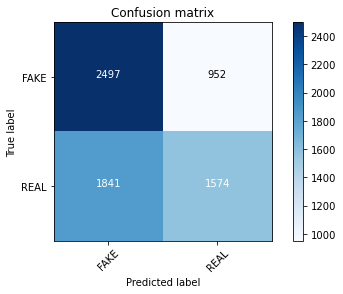

In [222]:
from sklearn import metrics
import numpy as np
import itertools
score = metrics.accuracy_score(y_test,y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [223]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5930944055944056

# Conclusion:

Seems like Most the News is Fake